## Observations and Insights 

1. The lowest final tumor volumes were acheived by  Ramicane and Capomulin, but 

## Beginning of the code

In [130]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,how="outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [131]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [132]:
merged_df.shape

(1893, 8)

In [133]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_df.loc[merged_df[['Mouse ID','Timepoint']].duplicated()==True]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [134]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = merged_df.loc[merged_df['Mouse ID']=='g989']
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop(merged_df[merged_df['Mouse ID']=='g989'].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [136]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [137]:
clean_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_means = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
regimen_medians = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
regimen_variances = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
regimen_stds = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
regimen_sems = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

regimen_summary = pd.DataFrame({'Mean':regimen_means,'Median':regimen_medians,'Variance':regimen_variances,
                                'Standard Deviation':regimen_stds, 'Standard Error of the Means':regimen_sems})
regimen_summary


,Mean,Median,Variance,Standard Deviation,Standard Error of the Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

alternative_regimen_summary = clean_df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
alternative_regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

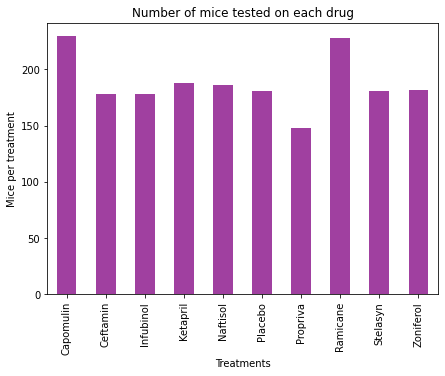

In [140]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

ax = mice_per_treatment.plot(kind='bar',color='purple', alpha=0.75,figsize=(7,5))
ax.set_title('Number of mice tested on each drug')
ax.set_xlabel('Treatments')
ax.set_ylabel('Mice per treatment')
plt.show()

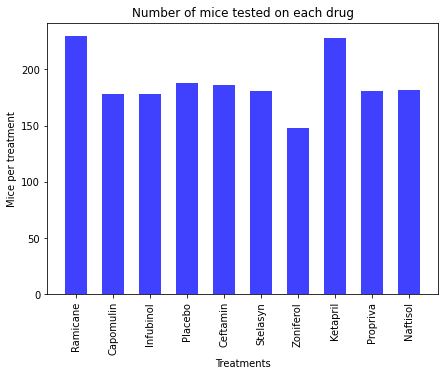

In [141]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatments = clean_df['Drug Regimen'].unique()
mice_per_treatment = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']
plt.figure(figsize=(7,5))
plt.bar(treatments, mice_per_treatment,color='blue', alpha=0.75 ,width=0.6)
plt.title('Number of mice tested on each drug')
plt.xlabel('Treatments')
plt.ylabel('Mice per treatment')
plt.xticks(treatments, rotation=90)
plt.show()

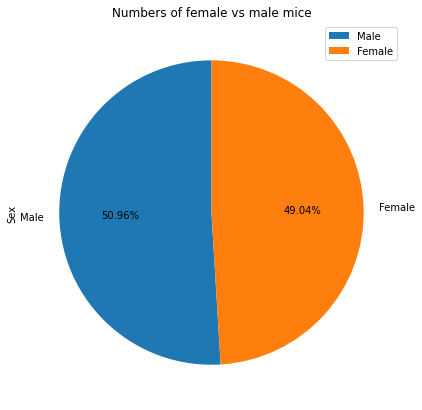

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_df['Sex'].value_counts()
chart = sex_count.plot(kind='pie',autopct='%.2f%%',figsize=(7,7),startangle=90)
chart.legend(['Male','Female'],loc='best')
chart.set_title('Numbers of female vs male mice')
plt.show()

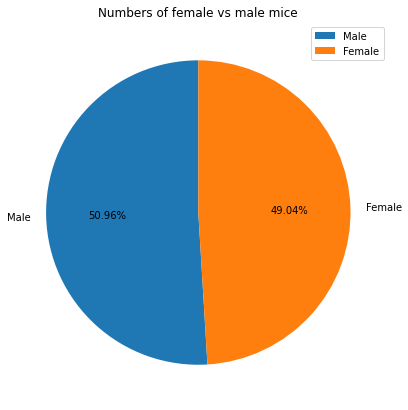

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df['Sex'].value_counts()
labels=['Male','Female']
plt.figure(figsize=(7,7))
plt.pie(sex_count,labels=labels,autopct='%.2f%%',startangle=90)
plt.legend(['Male','Female'],loc='best')
plt.title('Numbers of female vs male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#group_df = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')|(clean_df['Drug Regimen']=='Ramicane')|
#                       (clean_df['Drug Regimen']=='Infubinol')|(clean_df['Drug Regimen']=='Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint_df = last_timepoint_df.rename(columns={'Timepoint':'Last Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_df = pd.merge(clean_df,last_timepoint_df,on='Mouse ID',how='inner')
merged_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

tumor_vol = []
#Loop to collect mice's final tumor sizes for each treatment
for treatment in treatments:
    treatment_df = merged_tumor_df.loc[merged_tumor_df['Drug Regimen']==treatment]
    final_tumor = treatment_df.loc[treatment_df['Timepoint']==treatment_df['Last Timepoint'],'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    median = final_tumor.median()
    print(f'Median for {treatment} is {median}')
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    print(f'Lower quartile for {treatment} is {lowerq}')
    print(f'Upper quartile for {treatment} is {upperq}')
    iqr = upperq-lowerq
    lower_bound = lowerq-1.5*iqr
    upper_bound = upperq+1.5*iqr
    print(f'Lower bound for {treatment} is {lower_bound}')
    print(f'Upper bound for {treatment} is {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor.loc[(final_tumor<lower_bound)|(final_tumor>upper_bound)]
    print(f'Values for {treatment} contain {len(outliers)} outliers')
    print('===========================================================')
    
    
    

Median for Capomulin is 38.1251644
Lower quartile for Capomulin is 32.37735684
Upper quartile for Capomulin is 40.1592203
Lower bound for Capomulin is 20.70456164999999
Upper bound for Capomulin is 51.83201549
Values for Capomulin contain 0 outliers
Median for Ramicane is 36.56165229
Lower quartile for Ramicane is 31.56046955
Upper quartile for Ramicane is 40.65900627
Lower bound for Ramicane is 17.912664470000003
Upper bound for Ramicane is 54.30681135
Values for Ramicane contain 0 outliers
Median for Infubinol is 60.16518046
Lower quartile for Infubinol is 54.04860769
Upper quartile for Infubinol is 65.52574285
Lower bound for Infubinol is 36.83290494999999
Upper bound for Infubinol is 82.74144559000001
Values for Infubinol contain 1 outliers
Median for Ceftamin is 59.85195552
Lower quartile for Ceftamin is 48.72207785
Upper quartile for Ceftamin is 64.29983003
Lower bound for Ceftamin is 25.355449580000002
Upper bound for Ceftamin is 87.66645829999999
Values for Ceftamin contain 0 o

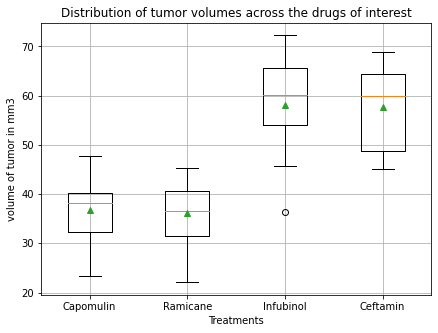

In [149]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Values are generated in the previous cell
plt.figure(figsize=(7,5))
plt.title('Distribution of tumor volumes across the drugs of interest')
plt.xlabel('Treatments')
plt.ylabel('volume of tumor in mm3')
plt.boxplot(tumor_vol, showmeans=True)
plt.xticks([1,2,3,4],treatments)
plt.grid()
plt.show()

# Line and Scatter Plots

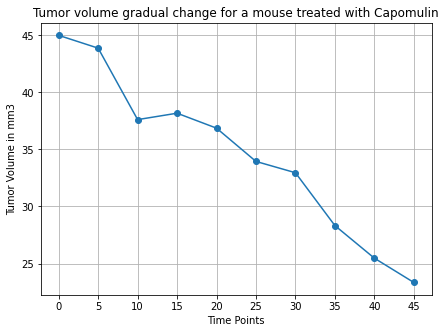

In [151]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#List mice treated by Capomulin
capomulin_mice = list(clean_df.loc[clean_df['Drug Regimen']=='Capomulin','Mouse ID'].unique())
#Picked the first mouse in the list
sample_mouse = capomulin_mice[0]
timepoints = clean_df.loc[clean_df['Mouse ID']==sample_mouse,'Timepoint']
tumorvolume = clean_df.loc[clean_df['Mouse ID']==sample_mouse,'Tumor Volume (mm3)']
plt.figure(figsize=(7,5))
plt.xticks(np.arange(0,50,5))
plt.title('Tumor volume gradual change for a mouse treated with Capomulin')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume in mm3')
plt.grid()
plt.plot(timepoints,tumorvolume,marker='o')
plt.show()

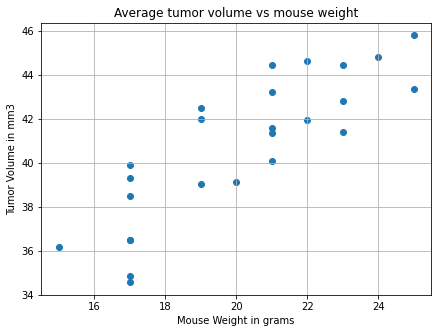

In [152]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = []
avg_tumor = []
for mouse in capomulin_mice:
    mouse_weight.append((clean_df.loc[clean_df['Mouse ID']==mouse,'Weight (g)']).mean())
    avg_tumor.append((clean_df.loc[clean_df['Mouse ID']==mouse,'Tumor Volume (mm3)']).mean())
plt.figure(figsize=(7,5))
plt.grid()
plt.title('Average tumor volume vs mouse weight')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumor Volume in mm3')
plt.scatter(mouse_weight,avg_tumor,marker='o')
plt.show()

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,avg_tumor)
print('Correlation coefficient between mouse weight and average tumor volume is '+str(round(correlation[0],3)))


Correlation coefficient between mouse weight and average tumor volume is 0.842


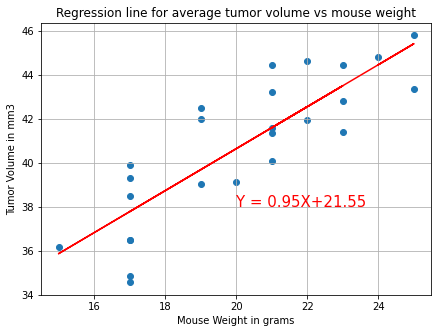

In [153]:
#Linear regression model
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(mouse_weight,avg_tumor)
#Convert mouse_weight from list to array to be able to run the regression equation
x_values = np.array(mouse_weight)
regress_values = x_values * slope + intercept
line_eq = 'Y = '+str(round(slope,2))+'X+'+str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.grid()
plt.title('Regression line for average tumor volume vs mouse weight')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumor Volume in mm3')
plt.annotate(line_eq,(20,38),fontsize=15,color='red')
plt.plot(mouse_weight,regress_values,'r-')
plt.scatter(mouse_weight,avg_tumor,marker='o')
plt.show()
